## Health Professionals in Colombia

According to the Ministerio de Salud y Proteccion Social in Colombia, there are between Health Providers Institutions and Independent Helaht Professionals about 60,000 entities authorized to provide health services in different specialties. How are these entities distributed in Colombia?

**Prerequisitos**

In [1]:
!pip install pyarrow

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 999)
pd.io.parquet.get_engine('auto')

**Analisis de Datos de Médicos e IPS**

In [3]:
dir_data= '../parquet_datasets'
medicos_ips=pd.read_parquet(f'{dir_data}/medicos_ips.parquet')

In [4]:
medicos_ips.head(1000)

,depa_nombre,muni_nombre,habi_codigo_habilitacion,codigo_habilitacion,numero_sede,sede_nombre,direccion,telefono,email,nits_nit,dv,clase_persona,naju_codigo,naju_nombre,clpr_codigo,clpr_nombre,ese,nivel,caracter,habilitado,grse_codigo,grse_nombre,serv_codigo,serv_nombre,ambulatorio,hospitalario,unidad_movil,domiciliario,otras_extramural,centro_referencia,institucion_remisora,complejidad_baja,complejidad_media,complejidad_alta,fecha_apertura,fecha_cierre,numero_distintivo,numero_sede_principal,observaciones_serv_Res3100_2019,fecha_corte_REPS,nombre_prestador,Unnamed: 41
0,Antioquia,MEDELLÍN,500100003,500100003.0,1,BERNARDO AGUDELO JARAMILLO,CL 19A N° 44- 25 Cons 2301,3665349,bernardo.agudelo@gmail.com,71578430,0,NATURAL,1,Privada,2,Profesional Independiente,,,None,SI,3,Consulta Externa,320,320 -GINECOBSTETRICIA,SI,NO,NO,NO,NO,NO,NO,NO,SI,NO,20110727,nan,DHS018733,01,None,Fecha corte REPS: Nov 28 2020 10:17PM,BERNARDO AGUDELO JARAMILLO,None
1,Antioquia,MEDELLÍN,500100008,500100008.0,1,ANA CARMENZA POSADA ISAZA,CL 2 SUR # 46 - 55 CS 253 FASE II CLINICA LAS...,2687270,consultorioacposada@une.net.co,32530725,0,NATURAL,1,Privada,2,Profesional Independiente,,,None,SI,3,Consulta Externa,328,328 -MEDICINA GENERAL,SI,NO,NO,NO,NO,NO,NO,SI,NO,NO,20121121,nan,DHS069909,01,None,Fecha corte REPS: Nov 28 2020 10:17PM,ANA CARMENZA POSADA ISAZA,None
2,Antioquia,MEDELLÍN,500100010,500100010.0,1,JUAN CAMILO RESTREPO SALCEDO,DIAG 75B # 2A - 80 CONS 809,None,None,70569409,6,NATURAL,1,Privada,2,Profesional Independiente,NO,,None,SI,3,Consulta Externa,342,342 -PEDIATRÍA,SI,NO,NO,NO,NO,NO,NO,NO,SI,NO,20030218,nan,DHS075097,01,None,Fecha corte REPS: Nov 28 2020 10:17PM,JUAN CAMILO RESTREPO SALCEDO,None
3,Antioquia,MEDELLÍN,500100012,500100012.0,1,INSTITUTO DEL CORAZON,CIRCULAR 73 N° 39-37,3207242,calidad@institutodelcorazon.org.co,800107179,2,JURIDICO,1,Privada,1,Instituciones - IPS,NO,,None,SI,7,Apoyo Diagnóstico y Complementación Terapéutica,701,701 -DIAGNÓSTICO CARDIOVASCULAR,SI,NO,NO,NO,NO,SI,NO,NO,NO,SI,20030219,nan,DHS140830,01,None,Fecha corte REPS: Nov 28 2020 10:17PM,INSTITUTO DEL CORAZON S.A.S,None
4,Antioquia,MEDELLÍN,500100012,500100012.0,1,INSTITUTO DEL CORAZON,CIRCULAR 73 N° 39-37,3207242,calidad@institutodelcorazon.org.co,800107179,2,JURIDICO,1,Privada,1,Instituciones - IPS,NO,,None,SI,7,Apoyo Diagnóstico y Complementación Terapéutica,729,729 -TERAPIA RESPIRATORIA,SI,NO,NO,SI,NO,NO,NO,SI,NO,NO,20130905,nan,DHS140832,01,None,Fecha corte REPS: Nov 28 2020 10:17PM,INSTITUTO DEL CORAZON S.A.S,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Antioquia,MEDELLÍN,500101227,500101227.0,1,PAULA ANDREA QUINTERO OLAYA,KR 48 # 19 A 40 CS 1511,2358769,paliquintero@hotmail.com,43748419,1,NATURAL,1,Privada,2,Profesional Independiente,NO,,None,SI,3,Consulta Externa,396,396 -ODONTOPEDIATRÍA,SI,NO,NO,NO,NO,NO,NO,NO,SI,NO,20061114,nan,DHS041550,01,None,Fecha corte REPS: Nov 28 2020 10:17PM,PAULA ANDREA QUINTERO OLAYA,None
996,Antioquia,MEDELLÍN,500101227,500101227.0,1,PAULA ANDREA QUINTERO OLAYA,KR 48 # 19 A 40 CS 1511,2358769,paliquintero@hotmail.com,43748419,1,NATURAL,1,Privada,2,Profesional Independiente,NO,,None,SI,10,Procesos,950,950 -PROCESO ESTERILIZACIÓN,SI,NO,NO,NO,NO,NO,NO,SI,NO,NO,20131119,nan,DHS041552,01,None,Fecha corte REPS: Nov 28 2020 10:17PM,PAULA ANDREA QUINTERO OLAYA,None
997,Antioquia,RIONEGRO,500101227,561501227.0,2,PAULA ANDREA QUINTERO OLAYA,CL 49 #50-71 LC 217,3006144646,paliquintero@hotmail.com,43748419,1,NATURAL,1,Privada,2,Profesional Independiente,NO,,None,SI,3,Consulta Externa,396,396 -ODONTOPEDIATRÍA,SI,NO,NO,NO,NO,NO,NO,NO,SI,NO,20200623,nan,DHS1074842,01,None,Fecha corte REPS: Nov 28 2020 10:17PM,PAULA ANDREA QUINTERO OLAYA,None
998,Antioquia,RIONEGRO,500101227,561501227.0,2,PAULA ANDREA QUINTERO OLAYA,CL 49 #50-71 LC 217,3006144646,paliquintero@hotmail.com,43748419,1,NATURAL,1,Privada,2,Profesi

In [5]:
medicos_ips.shape

(293124, 42)

In [6]:
medicos_ips.columns

Index(['depa_nombre', 'muni_nombre', 'habi_codigo_habilitacion',
       'codigo_habilitacion', 'numero_sede', 'sede_nombre', 'direccion',
       'telefono', 'email', 'nits_nit', 'dv', 'clase_persona', 'naju_codigo',
       'naju_nombre', 'clpr_codigo', 'clpr_nombre', 'ese', 'nivel', 'caracter',
       'habilitado', 'grse_codigo', 'grse_nombre', 'serv_codigo',
       'serv_nombre', 'ambulatorio', 'hospitalario', 'unidad_movil',
       'domiciliario', 'otras_extramural', 'centro_referencia',
       'institucion_remisora', 'complejidad_baja', 'complejidad_media',
       'complejidad_alta', 'fecha_apertura', 'fecha_cierre',
       'numero_distintivo', 'numero_sede_principal',
       'observaciones_serv_Res3100_2019', 'fecha_corte_REPS',
       'nombre_prestador', 'Unnamed: 41'],
      dtype='object')

The following are details about some of the important columns here:

1. ```depa_nombre``` : Ubicacion geografica de la IPS y/o médico en Colombia
2. ```codigo_habilitacion``` : Número único de habilitación asignado por el  Ministerio de Salud
3. ```serv_nombre``` : Nombre del servicio de salud habilitado para ser prestado por la IPs o médico
4. ```clpr_nombre``` : Identificacion entidad habilitada de IPS o médico
5. ```habilitado```: Identifica si la IPS ó médico independiente esta actualmente habilitada por el Ministerio de Salud
6. ```fecha_apertura```: Fecha en la cual la IPS o médico independiente fue habilitada por el Ministerio de Salud

Se realiza la identificación de las entidades que no están actualmente habilitadas para prestar sus servicios y son descartadas de la fuente de datos

In [7]:
medicos_ips['habilitado'].value_counts()

SI               292420
NO                  185
DEPARTAMENTAL       127
MUNICIPAL           113
                     82
                     10
Name: habilitado, dtype: int64

In [8]:
medicos_ips = medicos_ips[medicos_ips.habilitado == 'SI']
medicos_ips['habilitado'].value_counts()

SI    292420
Name: habilitado, dtype: int64

Se realiza la identificación de las enfermedades infecciosas mas relevantes en colombia las cuales correspondien a:
* Malaria
* Leishmaniasis 
* Zika
* Dengue
* Chikungunya
* Chagas
* Infecciones del tracto respiraotio

Para luego identificar los servicios asociados a la atención de cada uno de ellas, con lo cual se crean las siguientes estructuras de datos:

In [9]:
malaria_specialities = [
    '328 -MEDICINA GENERAL',
    '356 -OTRAS CONSULTAS DE ESPECIALIDAD   INFECTOLOGIA PEDIATRICA     -     NO ONCOLÓGICO ',
    '323 -INFECTOLOGÍA',
    '356 -OTRAS CONSULTAS DE ESPECIALIDAD   ENDOCRINOLOGIA PEDIATRICA, GINECOLOGIA PEDIATRICA Y DE LA ADOLESCENCIA, INFECTOLOGIA PEDIATRICA, OTO -     NO ONCOLÓGICO ',
    '321 -HEMATOLOGÍA',
    '312 -ENFERMERÍA',
    '320 -GINECOBSTETRICIA',
    '712 -TOMA DE MUESTRAS DE LABORATORIO CLÍNICO',
    '719 -ULTRASONIDO',
    '745 -IMÁGENES DIAGNOSTICAS – NO',
    '706 -LABORATORIO CLÍNICO',
    '714 -SERVICIO FARMACÉUTICO',
    '386 -NEUMOLOGÍA PEDIÁTRICA',
    '106 -CUIDADO INTERMEDIO PEDIÁTRICO',
    '108 -CUIDADO INTENSIVO NEONATAL',
    '109 -CUIDADO INTENSIVO PEDIÁTRICO',
    '704 -NEUMOLOGÍA - FIBROBRONCOSCOPIA',
    '384 -NEFROLOGÍA PEDIÁTRICA',
    '356 -OTRAS CONSULTAS DE ESPECIALIDAD   NEFROLOGIA      -     NO ONCOLÓGICO ',
    '356 -OTRAS CONSULTAS DE ESPECIALIDAD   NEUROLOGIA INFANTIL     -     NO ONCOLÓGICO ',
    '332 -NEUROLOGÍA',
    '101 -GENERAL ADULTOS',
    '107 -CUIDADO INTERMEDIO ADULTOS',
    '110 -CUIDADO INTENSIVO ADULTOS'
]

In [10]:
leishmaniais_specialities = [
    '328 -MEDICINA GENERAL',
    '356 -OTRAS CONSULTAS DE ESPECIALIDAD   INFECTOLOGIA PEDIATRICA     -     NO ONCOLÓGICO ',
    '323 -INFECTOLOGÍA',
    '356 -OTRAS CONSULTAS DE ESPECIALIDAD   ENDOCRINOLOGIA PEDIATRICA, GINECOLOGIA PEDIATRICA Y DE LA ADOLESCENCIA, INFECTOLOGIA PEDIATRICA, OTO -     NO ONCOLÓGICO ',
    '321 -HEMATOLOGÍA',
    '312 -ENFERMERÍA',
    '712 -TOMA DE MUESTRAS DE LABORATORIO CLÍNICO',
    '719 -ULTRASONIDO',
    '745 -IMÁGENES DIAGNOSTICAS – NO',
    '308 -DERMATOLOGÍA'
]

In [11]:
zika_specialities = [
    '328 -MEDICINA GENERAL',
    '356 -OTRAS CONSULTAS DE ESPECIALIDAD   INFECTOLOGIA PEDIATRICA     -     NO ONCOLÓGICO ',
    '323 -INFECTOLOGÍA''356 -OTRAS CONSULTAS DE ESPECIALIDAD   ENDOCRINOLOGIA PEDIATRICA, GINECOLOGIA PEDIATRICA Y DE LA ADOLESCENCIA, INFECTOLOGIA PEDIATRICA, OTO -     NO ONCOLÓGICO ',
    '312 -ENFERMERÍA''712 -TOMA DE MUESTRAS DE LABORATORIO CLÍNICO',
    '112 -OBSTETRICIA',
    '120 -CUIDADO BÁSICO NEONATAL',
    '201 -CIRUGÍA DE CABEZA Y CUELLO',
    '356 -OTRAS CONSULTAS DE ESPECIALIDAD   NEUROLOGIA INFANTIL     -     NO ONCOLÓGICO ',
    '332 -NEUROLOGÍA'
]

In [12]:
dengue_specialities = [
    '328 -MEDICINA GENERAL',
    '356 -OTRAS CONSULTAS DE ESPECIALIDAD   INFECTOLOGIA PEDIATRICA     -     NO ONCOLÓGICO ',
    '323 -INFECTOLOGÍA',
    '356 -OTRAS CONSULTAS DE ESPECIALIDAD   ENDOCRINOLOGIA PEDIATRICA, GINECOLOGIA PEDIATRICA Y DE LA ADOLESCENCIA, INFECTOLOGIA PEDIATRICA, OTO -     NO ONCOLÓGICO ',
    '321 -HEMATOLOGÍA',
    '312 -ENFERMERÍA',
    '320 -GINECOBSTETRICIA',
    '712 -TOMA DE MUESTRAS DE LABORATORIO CLÍNICO',
    '706 -LABORATORIO CLÍNICO',
    '356 -OTRAS CONSULTAS DE ESPECIALIDAD   NEUROLOGIA INFANTIL     -     NO ONCOLÓGICO '
    '332 -NEUROLOGÍA',
    '106 -CUIDADO INTERMEDIO PEDIÁTRICO',
    '109 -CUIDADO INTENSIVO PEDIÁTRICO',
    '356 -OTRAS CONSULTAS DE ESPECIALIDAD   ENDOCRINOLOGIA PEDIATRICA, REUMATOLOGIA PEDIATRICA, EVALUACION Y DIAGNOSTICO NEUROPSICOLOGICO     -  NO ONCOLÓGICO ',
    '101 -GENERAL ADULTOS',
    '107 -CUIDADO INTERMEDIO ADULTOS',
    '110 -CUIDADO INTENSIVO ADULTOS',
]

In [13]:
chkungunya_specialities = [
    '356 -OTRAS CONSULTAS DE ESPECIALIDAD   ENDOCRINOLOGIA PEDIATRICA, REUMATOLOGIA PEDIATRICA, EVALUACION Y DIAGNOSTICO NEUROPSICOLOGICO     -  NO ONCOLÓGICO ',
    '356 -OTRAS CONSULTAS DE ESPECIALIDAD   INFECTOLOGIA PEDIATRICA     -     NO ONCOLÓGICO ',
    '323 -INFECTOLOGÍA',
    '356 -OTRAS CONSULTAS DE ESPECIALIDAD   ENDOCRINOLOGIA PEDIATRICA, GINECOLOGIA PEDIATRICA Y DE LA ADOLESCENCIA, INFECTOLOGIA PEDIATRICA, OTO -     NO ONCOLÓGICO ',
    '321 -HEMATOLOGÍA',
    '312 -ENFERMERÍA',
    '712 -TOMA DE MUESTRAS DE LABORATORIO CLÍNICO',
    '706 -LABORATORIO CLÍNICO',    
]

In [14]:
chagas_specialities = [
    '302 -CARDIOLOGÍA',
    '316 -GASTROENTEROLOGÍA',
    '367 -CIRUGÍA GASTROINTESTINAL',
    '356 -OTRAS CONSULTAS DE ESPECIALIDAD   CIRUGIA LAPAROSCOPIA AVANZADA GASTROENTEROLOGIA CLINICO QUIRURGICA     -     NO ONCOLÓGICO ',
    '701 -DIAGNÓSTICO CARDIOVASCULAR',
    '732 -ECOCARDIOGRAFÍA ',
    '202 -CIRUGÍA CARDIOVASCULAR',
    '328 -MEDICINA GENERAL',
    '356 -OTRAS CONSULTAS DE ESPECIALIDAD   INFECTOLOGIA PEDIATRICA     -     NO ONCOLÓGICO ',
    '323 -INFECTOLOGÍA',
    '356 -OTRAS CONSULTAS DE ESPECIALIDAD   ENDOCRINOLOGIA PEDIATRICA, GINECOLOGIA PEDIATRICA Y DE LA ADOLESCENCIA, INFECTOLOGIA PEDIATRICA, OTO -     NO ONCOLÓGICO ',
    '312 -ENFERMERÍA',
    '712 -TOMA DE MUESTRAS DE LABORATORIO CLÍNICO',
    '719 -ULTRASONIDO',
    '745 -IMÁGENES DIAGNOSTICAS – NO',
    '706 -LABORATORIO CLÍNICO',
    '332 -NEUROLOGÍA',
    '108 -CUIDADO INTENSIVO NEONATAL',
    '385 -NEONATOLOGÍA''332 -NEUROLOGÍA',
    '101 -GENERAL ADULTOS',
    '107 -CUIDADO INTERMEDIO ADULTOS',
    '110 -CUIDADO INTENSIVO ADULTOS' 
]

In [15]:
ltri_specialities = [
    '328 -MEDICINA GENERAL',
    '312 -ENFERMERÍA',
    '712 -TOMA DE MUESTRAS DE LABORATORIO CLÍNICO',
    '719 -ULTRASONIDO',
    '745 -IMÁGENES DIAGNOSTICAS – NO',
    '706 -LABORATORIO CLÍNICO',
    '386 -NEUMOLOGÍA PEDIÁTRICA',
    '106 -CUIDADO INTERMEDIO PEDIÁTRICO',
    '108 -CUIDADO INTENSIVO NEONATAL',
    '109 -CUIDADO INTENSIVO PEDIÁTRICO',
    '704 -NEUMOLOGÍA - FIBROBRONCOSCOPIA',
    '133 -HOSPITALIZACIÓN PACIENTE CRÓNICO CON VENTILADOR',
    '101 -GENERAL ADULTOS',
    '107 -CUIDADO INTERMEDIO ADULTOS',
    '110 -CUIDADO INTENSIVO ADULTOS'
]

Con los conjuntos de datos anteriores, procedemos a realizar un filtro sobre los datos de medicos e ips para asi obtener aquellos que realmente pueden atender estas enfermedades

In [16]:
specialities = malaria_specialities + leishmaniais_specialities + ltri_specialities + chagas_specialities + zika_specialities + chkungunya_specialities + dengue_specialities
unique_list = [] 
    
for x in specialities: 
    if x not in unique_list: 
        unique_list.append(x)
        
medicos_ips = medicos_ips[medicos_ips['serv_nombre'].isin(unique_list)]
medicos_ips.shape

(59728, 42)

Con esta información obtenemos la cantidad total, de IPS y de médicos con los cuales se cuenta en cada uno de los departamentos en Colombia

In [18]:
lst_capacidades = []
lst_depto = medicos_ips['depa_nombre'].unique()
for i in lst_depto:
    cap_depto = len(medicos_ips[medicos_ips.depa_nombre == i]['codigo_habilitacion'].unique())
    lst_capacidades.append(cap_depto)

listTotal = pd.DataFrame(pd.Series(data = lst_capacidades, index = lst_depto))
listTotal.sort_values(by=[0], ascending=False)

,0
Bogotá D.C,3465
Antioquia,3053
Valle del cauca,1792
Atlántico,1052
Santander,982
...,...
Amazonas,28
Guaviare,24
Vichada,13
Guainía,7


<AxesSubplot:title={'center':'Total de IPS y Medicos por departamento'}>

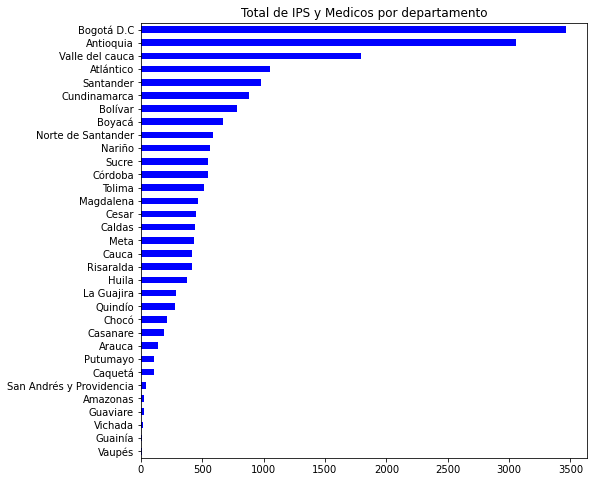

In [19]:
listTotal.sort_values(by = 0).plot.barh(y = 0, figsize = (8,8), color = 'blue', legend = False, title = 'Total de IPS y Medicos por departamento')

In [20]:
list_IPS = []
lst_depto = medicos_ips['depa_nombre'].unique()
for i in lst_depto:
    cap_ips = len(medicos_ips[medicos_ips.depa_nombre == i][medicos_ips['clpr_nombre'] == 'Instituciones - IPS']['codigo_habilitacion'].unique())
    list_IPS.append(cap_ips)

listIPS = pd.DataFrame(pd.Series(data = list_IPS, index = lst_depto))
listIPS.sort_values(by=[0], ascending=False)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,0
Antioquia,913
Bogotá D.C,909
Valle del cauca,743
Atlántico,598
Santander,576
...,...
San Andrés y Providencia,14
Guaviare,13
Vichada,10
Guainía,6


<AxesSubplot:title={'center':'Total de IPS por departamento'}>

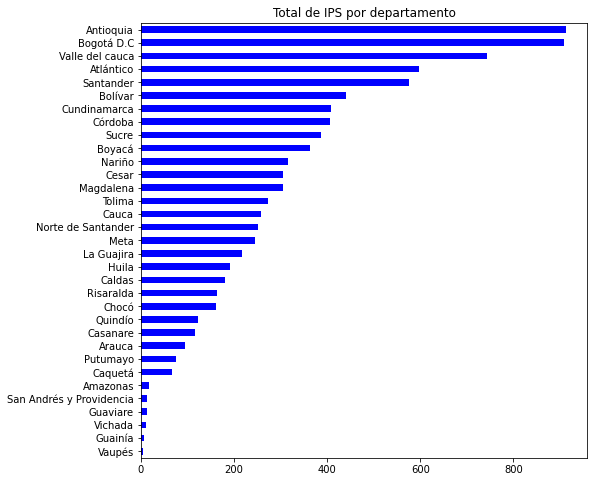

In [21]:
listIPS.sort_values(by = 0).plot.barh(y = 0, figsize = (8,8), color = 'blue', legend = False, title = 'Total de IPS por departamento')

In [22]:

list_Medicos = []
lst_depto = medicos_ips['depa_nombre'].unique()
for i in lst_depto:
    cap_medicos = len(medicos_ips[medicos_ips.depa_nombre == i][medicos_ips['clpr_nombre'] == 'Profesional Independiente']['codigo_habilitacion'].unique())
    list_Medicos.append(cap_medicos)

listMedicos = pd.DataFrame(pd.Series(data = list_Medicos, index = lst_depto))
listMedicos.sort_values(by=[0], ascending=False)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


,0
Bogotá D.C,2388
Antioquia,2028
Valle del cauca,940
Atlántico,440
Cundinamarca,384
...,...
Amazonas,10
Guaviare,10
Vichada,3
Guainía,1


<AxesSubplot:title={'center':'Total de Médicos Independientes por departamento'}>

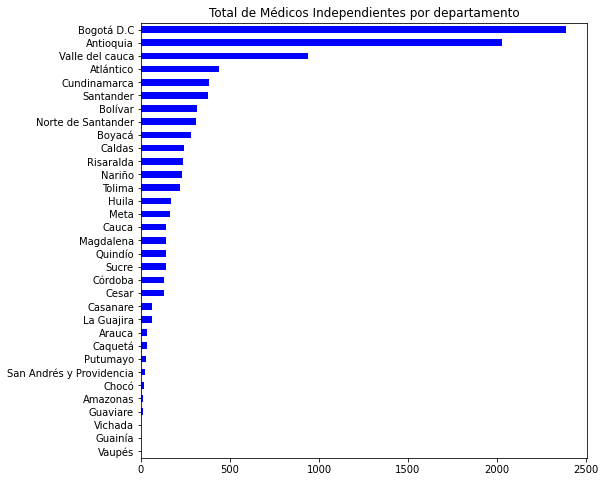

In [23]:
listMedicos.sort_values(by = 0).plot.barh(y = 0, figsize = (8,8), color = 'blue', legend = False, title = 'Total de Médicos Independientes por departamento')

Se observa que las zonas de Colombia donde hay mayor concentración de médicos independientes e IPS es proporcional a las zonas más pobladas del país; por lo cual, para tener una mejor idea de la capacidad de médicos e IPS procedemos a analizar la disponiblidad de prestadores de salud con respecto a la población de cada departamento

**Análisis de Datos Incluyendo Poblacion por Departamento**

In [24]:
poblacion = pd.read_parquet(f'{dir_data}/proyecciones_poblacion_departamental_2018-2050.parquet')
poblacion

,DP,DPNOM,AÑO,ÁREA GEOGRÁFICA,Hombres_0,Hombres_1,Hombres_2,Hombres_3,Hombres_4,Hombres_5,Hombres_6,Hombres_7,Hombres_8,Hombres_9,Hombres_10,Hombres_11,Hombres_12,Hombres_13,Hombres_14,Hombres_15,Hombres_16,Hombres_17,Hombres_18,Hombres_19,Hombres_20,Hombres_21,Hombres_22,Hombres_23,Hombres_24,Hombres_25,Hombres_26,Hombres_27,Hombres_28,Hombres_29,Hombres_30,Hombres_31,Hombres_32,Hombres_33,Hombres_34,Hombres_35,Hombres_36,Hombres_37,Hombres_38,Hombres_39,Hombres_40,Hombres_41,Hombres_42,Hombres_43,Hombres_44,Hombres_45,Hombres_46,Hombres_47,Hombres_48,Hombres_49,Hombres_50,Hombres_51,Hombres_52,Hombres_53,Hombres_54,Hombres_55,Hombres_56,Hombres_57,Hombres_58,Hombres_59,Hombres_60,Hombres_61,Hombres_62,Hombres_63,Hombres_64,Hombres_65,Hombres_66,Hombres_67,Hombres_68,Hombres_69,Hombres_70,Hombres_71,Hombres_72,Hombres_73,Hombres_74,Hombres_75,Hombres_76,Hombres_77,Hombres_78,Hombres_79,Hombres_80,Hombres_81,Hombres_82,Hombres_83,Hombres_84,Hombres_85,Hombres_86,Hombres_87,Hombres_88,Hombres_89,Hombres_90,Hombres_91,Hombres_92,Hombres_93,Hombres_94,Hombres_95,Hombres_96,Hombres_97,Hombres_98,Hombres_99,Hombres_100 y más,Mujeres_0,Mujeres_1,Mujeres_2,Mujeres_3,Mujeres_4,Mujeres_5,Mujeres_6,Mujeres_7,Mujeres_8,Mujeres_9,Mujeres_10,Mujeres_11,Mujeres_12,Mujeres_13,Mujeres_14,Mujeres_15,Mujeres_16,Mujeres_17,Mujeres_18,Mujeres_19,Mujeres_20,Mujeres_21,Mujeres_22,Mujeres_23,Mujeres_24,Mujeres_25,Mujeres_26,Mujeres_27,Mujeres_28,Mujeres_29,Mujeres_30,Mujeres_31,Mujeres_32,Mujeres_33,Mujeres_34,Mujeres_35,Mujeres_36,Mujeres_37,Mujeres_38,Mujeres_39,Mujeres_40,Mujeres_41,Mujeres_42,Mujeres_43,Mujeres_44,Mujeres_45,Mujeres_46,Mujeres_47,Mujeres_48,Mujeres_49,Mujeres_50,Mujeres_51,Mujeres_52,Mujeres_53,Mujeres_54,Mujeres_55,Mujeres_56,Mujeres_57,Mujeres_58,Mujeres_59,Mujeres_60,Mujeres_61,Mujeres_62,Mujeres_63,Mujeres_64,Mujeres_65,Mujeres_66,Mujeres_67,Mujeres_68,Mujeres_69,Mujeres_70,Mujeres_71,Mujeres_72,Mujeres_73,Mujeres_74,Mujeres_75,Mujeres_76,Mujeres_77,Mujeres_78,Mujeres_79,Mujeres_80,Mujeres_81,Mujeres_82,Mujeres_83,Mujeres_84,Mujeres_85,Mujeres_86,Mujeres_87,Mujeres_88,Mujeres_89,Mujeres_90,Mujeres_91,Mujeres_92,Mujeres_93,Mujeres_94,Mujeres_95,Mujeres_96,Mujeres_97,Mujeres_98,Mujeres_99,Mujeres_100 y más,Total_0,Total_1,Total_2,Total_3,Total_4,Total_5,Total_6,Total_7,Total_8,Total_9,Total_10,Total_11,Total_12,Total_13,Total_14,Total_15,Total_16,Total_17,Total_18,Total_19,Total_20,Total_21,Total_22,Total_23,Total_24,Total_25,Total_26,Total_27,Total_28,Total_29,Total_30,Total_31,Total_32,Total_33,Total_34,Total_35,Total_36,Total_37,Total_38,Total_39,Total_40,Total_41,Total_42,Total_43,Total_44,Total_45,Total_46,Total_47,Total_48,Total_49,Total_50,Total_51,Total_52,Total_53,Total_54,Total_55,Total_56,Total_57,Total_58,Total_59,Total_60,Total_61,Total_62,Total_63,Total_64,Total_65,Total_66,Total_67,Total_68,Total_69,Total_70,Total_71,Total_72,Total_73,Total_74,Total_75,Total_76,Total_77,Total_78,Total_79,Total_80,Total_81,Total_82,Total_83,Total_84,Total_85,Total_86,Total_87,Total_88,Total_89,Total_90,Total_91,Total_92,Total_93,Total_94,Total_95,Total_96,Total_97,Total_98,Total_99,Total_100 y más,Total Hombres,Total Mujeres,Total
0,5,Antioquia,2018,Cabecera Municipal,31398,31674,31916,32172,32460,32748,33071,33436,33835,34284,34803,35394,36045,36772,37569,38442,39379,40412,41629,42898,43930,44792,45319,45497,45368,45145,44827,44239,43327,42222,41122,40068,39127,38432,37841,37222,36483,35450,34022,32332,30607,28924,27599,26849,26552,26414,26428,26629,27026,27510,27945,28317,28393,28053,27409,26628,25740,24737,23751,22701,21606,20485,19381,18322,17287,16299,15326,14356,13450,12566,11695,10850,10040,9209,8413,7658,6931,6252,5624,5062,4525,4032,3585,3193,2808,2483,2184,1906,1658,1439,1250,1070,916,768,647,526,416,380,388,408,947,29904,30204,30525,30827,31176,31500,31883,32283,32732,33247,33807,34440,35145,35925,36790,37728,38757,39919,41295,42739,43968,45027,45747,46091,46078,45950,45701,45203,44422,43485,42558,41662,40977,40584,403

In [25]:
poblacion = poblacion[poblacion['ÁREA GEOGRÁFICA'] == 'Total']
poblacion = poblacion[poblacion['AÑO'] == 2020]
poblacion = poblacion.loc[:, ['DP','DPNOM','AÑO','ÁREA GEOGRÁFICA', 'Total']]
poblacion

,DP,DPNOM,AÑO,ÁREA GEOGRÁFICA,Total
8,5,Antioquia,2020,Total,6677930
107,8,Atlántico,2020,Total,2722128
206,11,"Bogotá, D.C.",2020,Total,7743955
305,13,Bolívar,2020,Total,2180976
404,15,Boyacá,2020,Total,1242731
...,...,...,...,...,...
2780,91,Amazonas,2020,Total,79020
2879,94,Guainía,2020,Total,50636
2978,95,Guaviare,2020,Total,86657
3077,97,Vaupés,2020,Total,44712


Debido a una diferencia en el nombramiento de los departamentos entre las fuentes de datos de prestadores de salud y de población se procede a realizar una unificación de nombres

In [26]:
reemplazo = {
    'Archipiélago de San Andrés':'San Andrés y Providencia',
    'Valle del Cauca':'Valle del cauca',
    'Bogotá, D.C.': 'Bogotá D.C',
    'Quindio':'Quindío'}
poblacion.DPNOM.replace(reemplazo, inplace = True)

In [27]:
poblacion.sort_values(by=['Total'], ascending=False)[['DPNOM','Total']]

,DPNOM,Total
206,Bogotá D.C,7743955
8,Antioquia,6677930
2285,Valle del cauca,4532152
998,Cundinamarca,3242999
107,Atlántico,2722128
...,...,...
2978,Guaviare,86657
2780,Amazonas,79020
2681,San Andrés y Providencia,63692
2879,Guainía,50636


<AxesSubplot:title={'center':'Población por Departamento 2020'}, ylabel='DPNOM'>

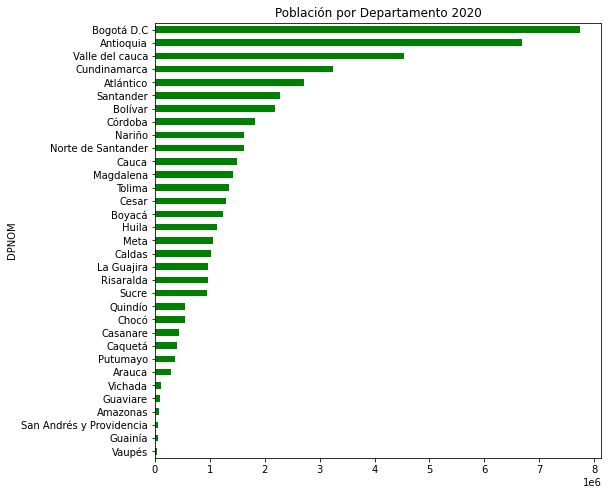

In [28]:
poblacion.sort_values(by = 'Total').plot.barh(x = 'DPNOM', y = 'Total', figsize = (8,8), color = 'green', legend = False, title = 'Población por Departamento 2020')

Procedemos a hacer una identificación de la relacion entre la disponiblidad de médicos e IPS en cada departamento con respecto a la población, para identificar cual es la capacidad en cada zona del pais

In [29]:
total_pob_2020 = poblacion.merge(pd.DataFrame(listTotal), left_on = 'DPNOM', right_index = True)
total_pob_2020['Habs_x_medicos_ips'] = round(total_pob_2020['Total']/total_pob_2020[0], 2)
total_pob_2020.sort_values(by=['Habs_x_medicos_ips'], ascending=False)[['DPNOM','Habs_x_medicos_ips']]

,DPNOM,Habs_x_medicos_ips
3176,Vichada,8689.08
3077,Vaupés,7452.00
2879,Guainía,7233.71
602,Caquetá,3872.84
998,Cundinamarca,3668.55
...,...,...
2384,Arauca,2163.28
1790,Quindío,2027.01
404,Boyacá,1863.16
2087,Sucre,1732.21


<AxesSubplot:title={'center':'Número de habitantes por cada prestador de servicio de salud por departamento'}, ylabel='DPNOM'>

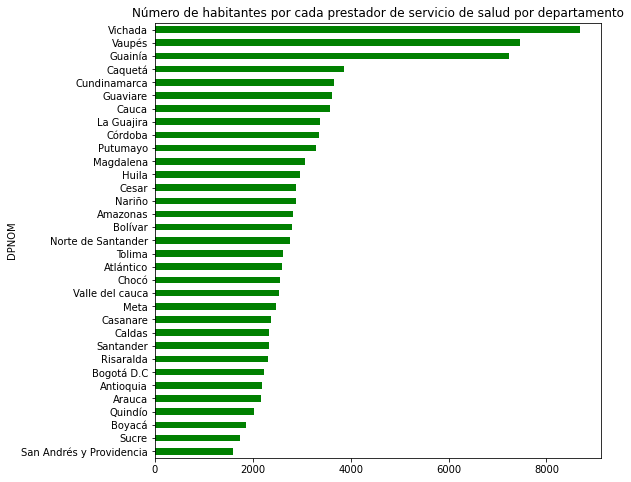

In [30]:
total_pob_2020.sort_values(by = 'Habs_x_medicos_ips').plot.barh(x = 'DPNOM', y = 'Habs_x_medicos_ips', figsize = (8,8), color = 'green', legend = False, title = 'Número de habitantes por cada prestador de servicio de salud por departamento')

In [31]:
ips_pob_2020 = poblacion.merge(pd.DataFrame(listIPS), left_on = 'DPNOM', right_index = True)
ips_pob_2020['Habs_x_ips'] = round(ips_pob_2020['Total']/ips_pob_2020[0], 2)
ips_pob_2020.sort_values(by=['Habs_x_ips'], ascending=False)[['DPNOM','Habs_x_ips']]

,DPNOM,Habs_x_ips
3176,Vichada,11295.80
3077,Vaupés,8942.40
206,Bogotá D.C,8519.20
2879,Guainía,8439.33
998,Cundinamarca,7929.09
...,...,...
2483,Casanare,3719.62
404,Boyacá,3423.50
1097,Chocó,3362.74
2384,Arauca,3129.85


<AxesSubplot:title={'center':'Número de habitantes por cada IPS por departamento'}, ylabel='DPNOM'>

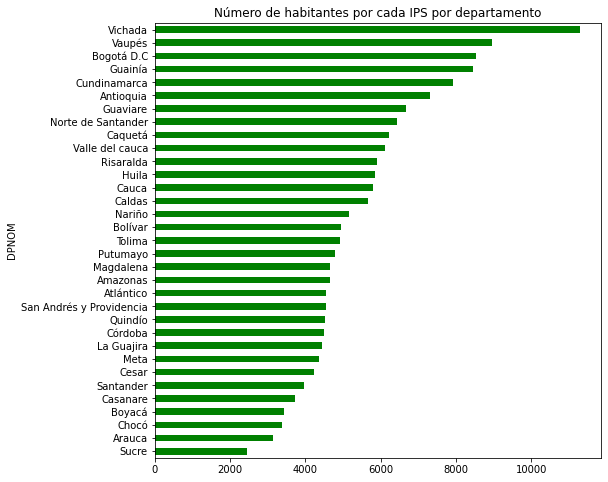

In [32]:
ips_pob_2020.sort_values(by = 'Habs_x_ips').plot.barh(x = 'DPNOM', y = 'Habs_x_ips', figsize = (8,8), color = 'green', legend = False, title = 'Número de habitantes por cada IPS por departamento')

In [33]:
med_pob_2020 = poblacion.merge(pd.DataFrame(listMedicos), left_on = 'DPNOM', right_index = True)
med_pob_2020['Habs_x_Medico'] = round(med_pob_2020['Total']/med_pob_2020[0], 2)
med_pob_2020.sort_values(by=['Habs_x_Medico'], ascending=False)[['DPNOM','Habs_x_Medico']]

,DPNOM,Habs_x_Medico
3077,Vaupés,inf
2879,Guainía,50636.00
3176,Vichada,37652.67
1097,Chocó,30264.67
1295,La Guajira,15831.44
...,...,...
1889,Risaralda,4089.60
1790,Quindío,3967.15
8,Antioquia,3292.86
206,Bogotá D.C,3242.86


<AxesSubplot:title={'center':'Número de habitantes por cada Medico Independiente por departamento'}, ylabel='DPNOM'>

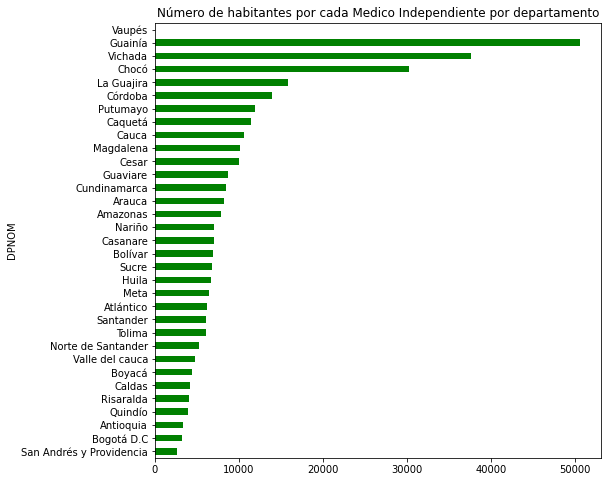

In [34]:
med_pob_2020.sort_values(by = 'Habs_x_Medico').plot.barh(x = 'DPNOM', y = 'Habs_x_Medico', figsize = (8,8), color = 'green', legend = False, title = 'Número de habitantes por cada Medico Independiente por departamento')

Unificando la poblacion de cada departemento con la disponibilidad de prestadores de salud se evidencian zonas del pais en donde no se cuenta con médicos o IPS, o la capacidad existente es muy limitada ante un brote de alguna de las enfermedades infecciosas analizadas.